#                                                  *Fraud detection*


### Our main concern is to generate a model to recognize anomalies in the transaction details. If an anomaly is detected and confirmed as fraud, appropriate action is taken to prevent it from happening.

# import the used libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# reading the Data

In [2]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')
df=  pd.concat([train, test], axis = 0)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [63]:
#https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv
#https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTest.csv

# having insights on the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

### as you see we have the data type of every column and the number of the columns(featuers) =23 and the number of the records=1852394 

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


we can see The measures of central tendency (mean ,mode ,median )  that describe the center  a dataset
These measures help provide a summary of the central  in a dataset and can provide insights into the distribution of the data.
we can estimate also The measures of dispersion(range ,standard deviation, variance ,interquartile range ), that describe the spread or variability of a dataset. They provide information about how the data points are spread out around the central tendency.

# EDA (Expolatory Data Analysis)

Text(0, 0.5, 'transactions')

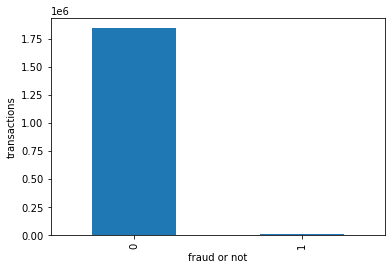

In [6]:
plt=df.is_fraud.value_counts().plot(kind='bar')
plt.set_xlabel("fraud or not")
plt.set_ylabel("transactions")

# Cleaining the data  

## 1- examining the null values

In [7]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

we have zero nulls 

In [8]:
(df.columns==0).sum()

0

all the collumns are filled 

## 2-examining the duplicates

In [9]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

In [10]:
num_duplicates

0

we have no duplicates

## 3- dropping unuseful cloumns 

In [11]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
dropped = ['Unnamed: 0', 'first', 'last', 'trans_num','zip','trans_date_trans_time','street','merchant','cc_num']
df = df.drop(columns=dropped)
print(df.columns)


Index(['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


# Note:
**the 'Unnamed: 0' ,'first', 'last','merchant',' cc_num' dropped as it is not useful as knowing your name  nor your cridet card number is not an indicator for fraud check.**
**'zip','street' dropped as we have 'long' , 'lat', 'state' that replaces them with the information needed.**
**'trans_num','trans_date_trans_time' dropped as we have 'unix_time' that replaces them**

# Checking the colleration between the target and  the susbected unusful features: 

In [13]:
df["is_fraud"]

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 1852394, dtype: int64

In [14]:
df['gender']

0         F
1         F
2         M
3         M
4         M
         ..
555714    M
555715    M
555716    F
555717    M
555718    M
Name: gender, Length: 1852394, dtype: object

In [15]:
df[['gender','is_fraud']].groupby('gender').count()#the number of frauds for each gender

,is_fraud
gender,
F,1014749
M,837645


we see that females have higher counts to be fraud than males 

In [16]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['gender'], df['is_fraud'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)


Chi-square statistic: 63.09104141423143
P-value: 1.97369744724312e-15
Degrees of freedom: 1


With a very small p-value (close to zero), we can conclude that there is a statistically significant association between the two binary variables.
he two binary variables are correlated

In [17]:
df['job']

0                 Psychologist, counselling
1         Special educational needs teacher
2               Nature conservation officer
3                           Patent attorney
4            Dance movement psychotherapist
                        ...                
555714                         Town planner
555715                       Futures trader
555716                             Musician
555717                         Cartographer
555718                          Media buyer
Name: job, Length: 1852394, dtype: object

In [18]:
# Separate the job titles using explode()
df = df.assign(job=df['job'].str.split(', ')).explode('job')

# Print the exploded DataFrame
print(df)


              category     amt gender            city state      lat  \
0             misc_net    4.97      F  Moravian Falls    NC  36.0788   
0             misc_net    4.97      F  Moravian Falls    NC  36.0788   
1          grocery_pos  107.23      F          Orient    WA  48.8878   
2        entertainment  220.11      M      Malad City    ID  42.1808   
3        gas_transport   45.00      M         Boulder    MT  46.2306   
...                ...     ...    ...             ...   ...      ...   
555714  health_fitness   43.77      M           Luray    MO  40.4931   
555715       kids_pets  111.84      M    Lake Jackson    TX  29.0393   
555716       kids_pets   86.88      F         Burbank    WA  46.1966   
555717          travel    7.99      M            Mesa    ID  44.6255   
555718   entertainment   38.13      M          Edmond    OK  35.6665   

            long  city_pop                                job         dob  \
0       -81.1781      3495                       Psycholog

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of the two variables
contingency_table = pd.crosstab(df['job'], df['is_fraud'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)



Chi-square statistic: 44242.23200815079
P-value: 0.0
Degrees of freedom: 528


 the results indicate a highly significant association between the categorical variable and the binary variable, as indicated by the very low p-value. The large chi-square statistic and the high degrees of freedom further support the evidence of a strong association. chi square technique is used as there are 2 variables one is nominal and the other is binary  used to determine if there is a statistically significant association between two categorical variables.
 the degrees of freedom provide information about the amount of independent information available in the data and influence the statistical calculations and interpretation of results.

# Scaling the numeric columns for  ease of handling 

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform
df['amt'] = scaler.fit_transform(df[['amt']])


# Fit the scaler to the data and transform the column

df['city_pop']=scaler.fit_transform(df[['city_pop']])

# Print the scaled values
print(df['amt'])

print(df['city_pop'])

0         0.000137
0         0.000137
1         0.003670
2         0.007569
3         0.001520
            ...   
555714    0.001477
555715    0.003829
555716    0.002967
555717    0.000241
555718    0.001283
Name: amt, Length: 2298853, dtype: float64
0         0.001194
0         0.001194
1         0.000043
2         0.001421
3         0.000659
            ...   
555714    0.000171
555715    0.009879
555716    0.001260
555717    0.000036
555718    0.039901
Name: city_pop, Length: 2298853, dtype: float64


# Checking the outliers for numeric columns 

count    2.298853e+06
mean     2.379853e-03
std      5.476052e-03
min      0.000000e+00
25%      2.960491e-04
50%      1.592171e-03
75%      2.830603e-03
max      1.000000e+00
Name: amt, dtype: float64


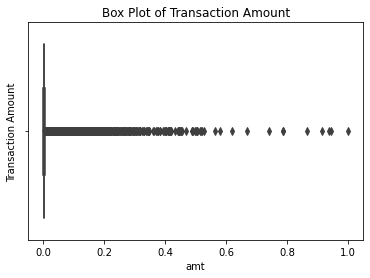

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Step 1: Descriptive Statistics
print(df['amt'].describe())

# Step 2: Box Plot
sns.boxplot(x=df["amt"])

plt.xlabel('amt')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()

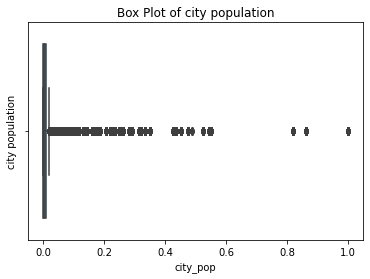

In [22]:
sns.boxplot(x=df["city_pop"])

plt.xlabel('city_pop')
plt.ylabel('city population')
plt.title('Box Plot of city population')
plt.show()

# Handling the outliers 

In [23]:
import numpy as np
import pandas as pd

def replace_outliers_with_median(df, col_name, threshold=3):
    """
    Replaces outliers in a given numeric column of a pandas DataFrame
    with the median of that column.
    
    Parameters:
        - df (pandas.DataFrame): The DataFrame containing the column with outliers.
        - col_name (str): The name of the column to be cleaned.
        - threshold (float): The number of standard deviations beyond which a value is considered an outlier.
                             Default is 3.
                             
    Returns:
        - pandas.DataFrame: A copy of the input DataFrame with outliers replaced by the median.
    """
    # Calculate the median of the column
    median = df[col_name].median()
    
    # Calculate the median absolute deviation (MAD)
    mad = np.abs(df[col_name] - median).median()
    
    # Calculate the threshold value for outliers
    threshold_value = threshold * mad
    
    # Replace the outliers with the median
    
    df.loc[np.abs(df[col_name] - median) > threshold_value, col_name] = median
    
    return df


##### The replace_outliers_with_median function ,takes a pandas DataFrame (df), a column name (col_name), and an optional threshold value (threshold) as input. It replaces outliers in the specified column with the median of that column and returns a copy of the DataFrame with the outliers replaced.The choice of 3 as the default threshold value is somewhat arbitrary and can be adjusted depending on the specific needs of the analysis or the characteristics of the dataset. A higher threshold value will identify fewer outliers

In [24]:
replace_outliers_with_median(df, 'city_pop', threshold=3)
replace_outliers_with_median(df, 'amt', threshold=3)

,category,amt,gender,city,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,Psychologist,1988-03-09,1325376018,36.011293,-82.048315,0
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,counselling,1988-03-09,1325376018,36.011293,-82.048315,0
1,grocery_pos,0.003670,F,Orient,WA,48.8878,-118.2105,0.000043,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,entertainment,0.001592,M,Malad City,ID,42.1808,-112.2620,0.001421,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,gas_transport,0.001520,M,Boulder,MT,46.2306,-112.1138,0.000659,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,0.001477,M,Luray,MO,40.4931,-91.8912,0.000171,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,kids_pets,0.003829,M,Lake Jackson,TX,29.0393,-95.4401,0.000875,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,kids_pets,0.002967,F,Burbank,WA,46.1966,-118.9017,0.001260,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,travel,0.000241,M,Mesa,ID,44.6255,-116.4493,0.000036,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


count    2.298853e+06
mean     7.436885e-04
std      5.837299e-04
min      0.000000e+00
25%      2.552743e-04
50%      8.748822e-04
75%      8.748822e-04
max      3.145172e-03
Name: city_pop, dtype: float64


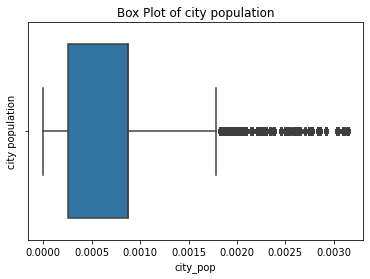

In [25]:
print(df['city_pop'].describe())

sns.boxplot(x=df["city_pop"])

plt.xlabel('city_pop')
plt.ylabel('city population')
plt.title('Box Plot of city population')
plt.show()

In [26]:
replace_outliers_with_median(df, 'city_pop', threshold=3)

,category,amt,gender,city,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,Psychologist,1988-03-09,1325376018,36.011293,-82.048315,0
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,counselling,1988-03-09,1325376018,36.011293,-82.048315,0
1,grocery_pos,0.003670,F,Orient,WA,48.8878,-118.2105,0.000043,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,entertainment,0.001592,M,Malad City,ID,42.1808,-112.2620,0.001421,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,gas_transport,0.001520,M,Boulder,MT,46.2306,-112.1138,0.000659,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,0.001477,M,Luray,MO,40.4931,-91.8912,0.000171,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,kids_pets,0.003829,M,Lake Jackson,TX,29.0393,-95.4401,0.000875,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,kids_pets,0.002967,F,Burbank,WA,46.1966,-118.9017,0.001260,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,travel,0.000241,M,Mesa,ID,44.6255,-116.4493,0.000036,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


count    2.298853e+06
mean     6.751633e-04
std      4.546033e-04
min      0.000000e+00
25%      2.552743e-04
50%      8.748822e-04
75%      8.748822e-04
max      2.024649e-03
Name: city_pop, dtype: float64


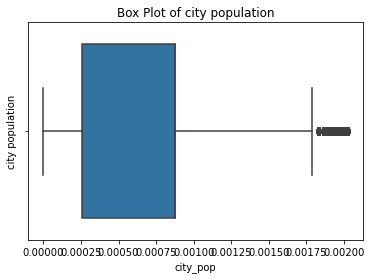

In [27]:
print(df['city_pop'].describe())

sns.boxplot(x=df["city_pop"])

plt.xlabel('city_pop')
plt.ylabel('city population')
plt.title('Box Plot of city population')
plt.show()

In [28]:
replace_outliers_with_median(df, 'city_pop', threshold=3)

,category,amt,gender,city,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,Psychologist,1988-03-09,1325376018,36.011293,-82.048315,0
0,misc_net,0.000137,F,Moravian Falls,NC,36.0788,-81.1781,0.001194,counselling,1988-03-09,1325376018,36.011293,-82.048315,0
1,grocery_pos,0.003670,F,Orient,WA,48.8878,-118.2105,0.000043,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,entertainment,0.001592,M,Malad City,ID,42.1808,-112.2620,0.001421,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,gas_transport,0.001520,M,Boulder,MT,46.2306,-112.1138,0.000659,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,health_fitness,0.001477,M,Luray,MO,40.4931,-91.8912,0.000171,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,kids_pets,0.003829,M,Lake Jackson,TX,29.0393,-95.4401,0.000875,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,kids_pets,0.002967,F,Burbank,WA,46.1966,-118.9017,0.001260,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,travel,0.000241,M,Mesa,ID,44.6255,-116.4493,0.000036,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


count    2.298853e+06
mean     6.413283e-04
std      3.943367e-04
min      0.000000e+00
25%      2.552743e-04
50%      8.748822e-04
75%      8.748822e-04
max      1.784856e-03
Name: city_pop, dtype: float64


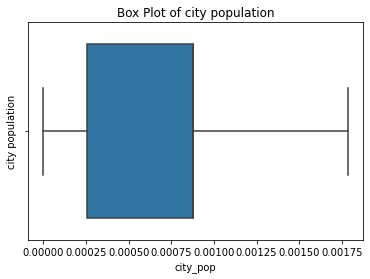

In [29]:
print(df['city_pop'].describe())

sns.boxplot(x=df["city_pop"])

plt.xlabel('city_pop')
plt.ylabel('city population')
plt.title('Box Plot of city population')
plt.show()

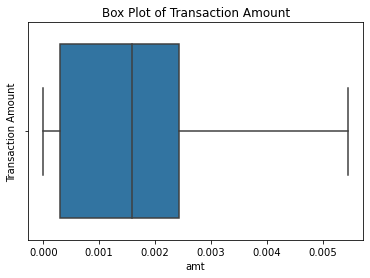

In [30]:
sns.boxplot(x=df["amt"])

plt.xlabel('amt')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()

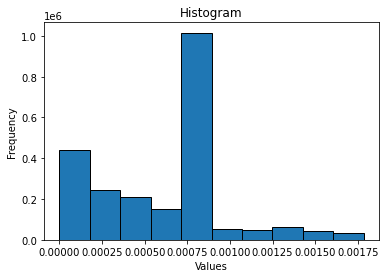

In [31]:
import matplotlib.pyplot as plt
# Plotting the histogram
plt.hist(df['city_pop'], bins=10, edgecolor='black')
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
# Display the histogram
plt.show()

# converting defferent data types to numuric types for modling perpration 

## creating a new coloumn from the dob 

In [32]:
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year


In [33]:
df.drop('dob', axis=1, inplace=True)

In [34]:
df.columns


Index(['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

In [35]:
df.state


0         NC
0         NC
1         WA
2         ID
3         MT
          ..
555714    MO
555715    TX
555716    WA
555717    ID
555718    OK
Name: state, Length: 2298853, dtype: object

### One-hot encoding is a technique used to represent categorical variables as binary vectors[nominal variables].

In [36]:

# Perform one-hot encoding
encoded_data = pd.get_dummies(df['state'], prefix='state')

# Concatenate the encoded data with the original data
data_encoded = pd.concat([df, encoded_data], axis=1)

# Update the 'state' column with the encoded values
df['state'] = data_encoded['state'].astype('category').cat.codes

# Print the encoded data
print(df['state'])




0         27
0         27
1         47
2         13
3         26
          ..
555714    24
555715    43
555716    47
555717    13
555718    36
Name: state, Length: 2298853, dtype: int8


In [37]:
# Sample data with a 'city' column


# Perform one-hot encoding
encoded_data = pd.get_dummies(df['city'], prefix='city')

# Concatenate the encoded data with the original data
data_encoded = pd.concat([df, encoded_data], axis=1)

# Update the 'state' column with the encoded values
df['city'] = data_encoded['city'].astype('category').cat.codes

# Print the encoded data
print(df['city'])



0         532
0         532
1         619
2         474
3          84
         ... 
555714    471
555715    427
555716    110
555717    508
555718    239
Name: city, Length: 2298853, dtype: int16


In [38]:
# Sample data with a 'category' column


# Perform one-hot encoding
encoded_data = pd.get_dummies(df['category'], prefix='category')

# Concatenate the encoded data with the original data
data_encoded = pd.concat([df, encoded_data], axis=1)

# Update the 'state' column with the encoded values
df['category'] = data_encoded['category'].astype('category').cat.codes

# Print the encoded data
print(df['category'])



0          8
0          8
1          4
2          0
3          2
          ..
555714     5
555715     7
555716     7
555717    13
555718     0
Name: category, Length: 2298853, dtype: int8


In [39]:
# Sample data with a 'category' column


# Perform one-hot encoding
encoded_data = pd.get_dummies(df['gender'], prefix='gender')

# Concatenate the encoded data with the original data
data_encoded = pd.concat([df, encoded_data], axis=1)

# Update the 'state' column with the encoded values
df['gender'] = data_encoded['gender'].astype('category').cat.codes

# Print the encoded data
print(df['gender'])

0         0
0         0
1         0
2         1
3         1
         ..
555714    1
555715    1
555716    0
555717    1
555718    1
Name: gender, Length: 2298853, dtype: int8


In [40]:
df

,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,8,0.000137,0,532,27,36.0788,-81.1781,0.001194,Psychologist,1325376018,36.011293,-82.048315,0,35
0,8,0.000137,0,532,27,36.0788,-81.1781,0.001194,counselling,1325376018,36.011293,-82.048315,0,35
1,4,0.003670,0,619,47,48.8878,-118.2105,0.000043,Special educational needs teacher,1325376044,49.159047,-118.186462,0,45
2,0,0.001592,1,474,13,42.1808,-112.2620,0.001421,Nature conservation officer,1325376051,43.150704,-112.154481,0,61
3,2,0.001520,1,84,26,46.2306,-112.1138,0.000659,Patent attorney,1325376076,47.034331,-112.561071,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,5,0.001477,1,471,24,40.4931,-91.8912,0.000171,Town planner,1388534347,39.946837,-91.333331,0,57
555715,7,0.003829,1,427,43,29.0393,-95.4401,0.000875,Futures trader,1388534349,29.661049,-96.186633,0,24
555716,7,0.002967,0,110,47,46.1966,-118.9017,0.001260,Musician,1388534355,46.658340,-119.715054,0,42
555717,13,0.000241,1,508,13,44.6255,-116.4493,0.000036,Cartographer,1388534364,44.470525,-117.080888,0,58


In [41]:
df['job']

0                              Psychologist
0                               counselling
1         Special educational needs teacher
2               Nature conservation officer
3                           Patent attorney
                        ...                
555714                         Town planner
555715                       Futures trader
555716                             Musician
555717                         Cartographer
555718                          Media buyer
Name: job, Length: 2298853, dtype: object

In [42]:

# Perform one-hot encoding
encoded_data = pd.get_dummies(df['job'], prefix='job')

# Concatenate the encoded data with the original data
data_encoded = pd.concat([df, encoded_data], axis=1)

# Update the 'state' column with the encoded values
df['job'] = data_encoded['job'].astype('category').cat.codes

# Print the encoded data
print(df['job'])


0         321
0         455
1         368
2         263
3         284
         ... 
555714    400
555715    165
555716    262
555717     56
555718    244
Name: job, Length: 2298853, dtype: int16


In [43]:
df

,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,8,0.000137,0,532,27,36.0788,-81.1781,0.001194,321,1325376018,36.011293,-82.048315,0,35
0,8,0.000137,0,532,27,36.0788,-81.1781,0.001194,455,1325376018,36.011293,-82.048315,0,35
1,4,0.003670,0,619,47,48.8878,-118.2105,0.000043,368,1325376044,49.159047,-118.186462,0,45
2,0,0.001592,1,474,13,42.1808,-112.2620,0.001421,263,1325376051,43.150704,-112.154481,0,61
3,2,0.001520,1,84,26,46.2306,-112.1138,0.000659,284,1325376076,47.034331,-112.561071,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,5,0.001477,1,471,24,40.4931,-91.8912,0.000171,400,1388534347,39.946837,-91.333331,0,57
555715,7,0.003829,1,427,43,29.0393,-95.4401,0.000875,165,1388534349,29.661049,-96.186633,0,24
555716,7,0.002967,0,110,47,46.1966,-118.9017,0.001260,262,1388534355,46.658340,-119.715054,0,42
555717,13,0.000241,1,508,13,44.6255,-116.4493,0.000036,56,1388534364,44.470525,-117.080888,0,58


In [44]:
df.dtypes

category         int8
amt           float64
gender           int8
city            int16
state            int8
lat           float64
long          float64
city_pop      float64
job             int16
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
age             int64
dtype: object

# checking the data balance

In [45]:
value_counts = df['is_fraud'].value_counts()
print(value_counts)


0    2286912
1      11941
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

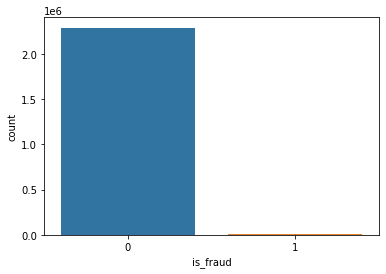

In [46]:

sns.countplot(x='is_fraud', data=df)


In [47]:

imbalance_ratio = value_counts[1] / value_counts[0]
print(imbalance_ratio)


0.005221451459435256


the data is unblacned as the number of zeros are too way counted than the ones

the target column is our concern so we will split the data to y for the target and x for the features

In [48]:
y=df["is_fraud"]

In [49]:
x=df.drop('is_fraud', axis=1)

over sampling technique is chosen for amplifing the zeros counts 

In [50]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' is your feature matrix and 'y' is your target variable
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x, y)


In [51]:
y_resampled

0          0
1          0
2          0
3          0
4          0
          ..
4573819    1
4573820    1
4573821    1
4573822    1
4573823    1
Name: is_fraud, Length: 4573824, dtype: int64

# Modeling (decision tree)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=1)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)




# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)



Accuracy: 99.38497865572032


In [53]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    457364
           1       0.99      1.00      0.99    457401

    accuracy                           0.99    914765
   macro avg       0.99      0.99      0.99    914765
weighted avg       0.99      0.99      0.99    914765



## The results  provided are the evaluation metrics of a binary classification model. 
The metrics you provided are commonly used in classification tasks to evaluate the performance of a model. Here's the interpretation of each metric:

Precision: Precision measures the accuracy of the positive predictions made by the model. In this case, for class 0, the precision is 1.00, which means that when the model predicts an instance as class 0, it is correct 100% of the time. For class 1, the precision is 0.99, indicating that the model's positive predictions for class 1 are correct 99% of the time.

Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances. For class 0, the recall is 0.99, indicating that the model can correctly identify 99% of the instances belonging to class 0. For class 1, the recall is 1.00, meaning that the model can correctly identify all instances belonging to class 1.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall. The F1-score ranges from 0 to 1, where 1 represents the best possible value. In this case, both classes have an F1-score of 0.99, indicating high performance in terms of both precision and recall.

Support: Support represents the number of instances in each class. For class 0, there are 457,364 instances, and for class 1, there are 457,401 instances.

Accuracy: The overall accuracy of the model is calculated as the ratio of correct predictions to the total number of predictions. In this case, the accuracy is 0.99, meaning that the model is correct in its predictions 99% of the time.

Macro Avg: Macro average calculates the average metric value across all classes, giving equal weight to each class. In this case, the macro average precision, recall, and F1-score are all 0.99.

Weighted Avg: Weighted average calculates the average metric value across all classes, taking into account the support (number of instances) of each class. It gives higher weight to classes with more instances. In this case, the weighted average precision, recall, and F1-score are all 0.99.

#### Overall, the model seems to perform well with high precision, recall, and F1-score values, indicating accurate predictions across both classes. The high accuracy suggests that the model is effective in classifying instances correctly in the dataset.

# Decision tree graph

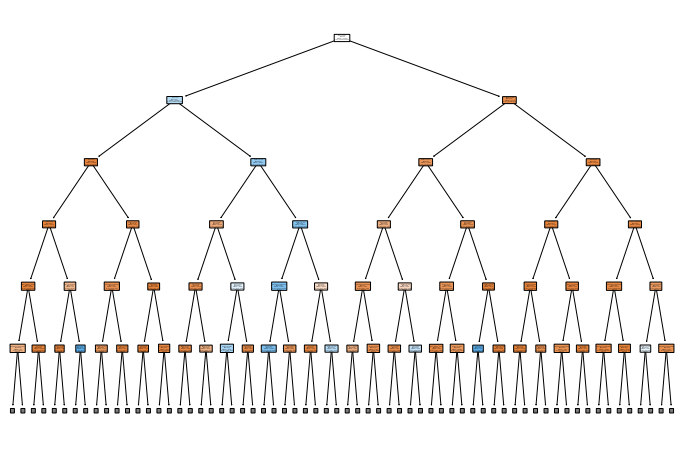

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_cols = ['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age']
target = ['is_fraud']

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(clf, max_depth=5, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True)

plt.show()


### The mode is so complex to generate the full tree as it takes a huge amount of time so the depth is limited to 5 